starting
(100, 1)
finished


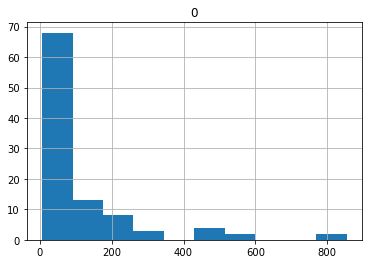

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

class Person:
    def __init__(self, id, wealth):
        self.id = id
        self.wealth = wealth
        
    def trade(self, counterparty):
        """
        simulate two people having a trade interaction with a winner and a loser
        """
        # print("p {0} and p{1} trading".format(self.id, counterparty.id))
        # trade for half of whoever has the least money rounded down
        trade_amount = math.floor(min(self.wealth, counterparty.wealth) / 2)
        if bool(random.getrandbits(1)): # you trade well
            self.wealth += trade_amount
            counterparty.wealth -= trade_amount
        else: #you trade badly
            counterparty.wealth += trade_amount
            self.wealth -= trade_amount
        # print("p {0} w{1} and p{2} w{3} left with".format(self.id, self.wealth, counterparty.id, counterparty.wealth))
            
class Society:
    
    def __init__(self, number_of_people):
        self.people = []
        for i in range(number_of_people):
            self.people.append(Person(i+1, 100))
               
    
    def evolve(self, trades, ubi=False):
        for i in range(trades):
            first_person = random.choice(self.people)
            second_person = random.choice(self.people)
            first_person.trade(second_person)
        if ubi:
            for p in self.people: 
                p.wealth += 5
   
print('starting')
s = Society(100)
s.evolve(1000, True)
wealth_dist = list(map(lambda x: x.wealth, s.people))
df = pd.DataFrame.from_dict(wealth_dist)
print(df.shape)
df.hist()
#plt.hist(df, bins=100)
#plt.show()
print('finished')

